### 2 практическая

1 задание

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 1000)
y = np.full_like(x, np.nan)  # Создаем массив из NaN

# Создаем маску для x <= 1
mask = x <= 1
y[mask] = np.sqrt(1 - x[mask]) - 5 * np.sin(2 * x[mask])

plt.plot(x, y)
plt.axhline(0, color='black')
plt.grid(True)
plt.show()

# Находим интервалы с корнями
for i in range(len(x)-1):
    if not np.isnan(y[i]) and not np.isnan(y[i+1]):
        if y[i] * y[i+1] < 0:
            print(f'Корень на [{x[i]:.2f}, {x[i+1]:.2f}]')

: 

2 задание

In [ ]:
def f(x):
    return np.sqrt(1-x) - 5 * np.sin(2*x) if x <= 1 else np.nan

a, b = 2, 3
eps = 0.001

print('  n      a        b        c       f(c)      |b-a|')
print('-'*50)

n = 1
while b - a > eps:
    c = (a + b) / 2
    print(f'{n:2d}   {a:.6f} {b:.6f} {c:.6f} {f(c):.6f} {b-a:.6f}')

    if f(a) * f(c) < 0:
        b = c
    else:
        a = c
    n += 1

print(f'\nКорень: x = {c:.6f}')
print(f'Проверка: f({c:.6f}) = {f(c):.6f}')

  n      a        b        c       f(c)      |b-a|
--------------------------------------------------
 1   2.000000 3.000000 2.500000 nan 1.000000
 2   2.500000 3.000000 2.750000 nan 0.500000
 3   2.750000 3.000000 2.875000 nan 0.250000
 4   2.875000 3.000000 2.937500 nan 0.125000
 5   2.937500 3.000000 2.968750 nan 0.062500
 6   2.968750 3.000000 2.984375 nan 0.031250
 7   2.984375 3.000000 2.992188 nan 0.015625
 8   2.992188 3.000000 2.996094 nan 0.007812
 9   2.996094 3.000000 2.998047 nan 0.003906
10   2.998047 3.000000 2.999023 nan 0.001953

Корень: x = 2.999023
Проверка: f(2.999023) = nan


### 3 практическая

1 задание

In [ ]:
import math

x = 0.5  # начальное значение (подобрано для первого корня)
eps = 0.001

while True:
    x_new = 1 - 25 * math.sin(2 * x) ** 2  # преобразованное уравнение
    if abs(x_new - x) < eps:
        break
    x = x_new

print(f'Корень: {x:.4f}')
print(f'Проверка: sqrt({x:.4f}) = {math.sqrt(1 - x):.4f}\n5sin(2 * {x:.4f}) = {5 * math.sin(2 * x):.4f}')

Корень: -16.7771
Проверка: sqrt(-16.7771) = 4.2163
5sin(2 * -16.7771) = -4.2162


### 4 практическая

1 задание

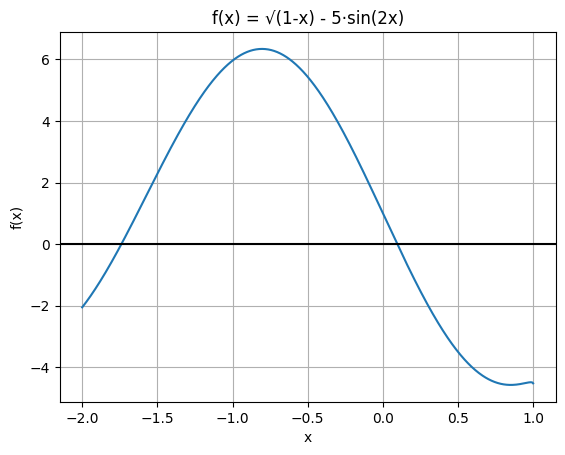

Корень на [-1.74, -1.74]
Корень на [0.09, 0.10]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2, 2, 1000)

# Маскируем значения x > 1 (где sqrt не определён)
x_valid = x[x <= 1]
y_valid = np.sqrt(1 - x_valid) - 5 * np.sin(2 * x_valid)

plt.plot(x_valid, y_valid)
plt.axhline(0, color='black')
plt.grid(True)
plt.title('f(x) = √(1-x) - 5·sin(2x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

# Находим интервалы с корнями
for i in range(len(x_valid)-1):
    if y_valid[i] * y_valid[i+1] < 0:
        print(f'Корень на [{x_valid[i]:.2f}, {x_valid[i+1]:.2f}]')

2 задание

In [ ]:
import math

def f(x):
    return math.sqrt(1 - x) - 5 * math.sin(2 * x)

a, b = 0.5, 1.0  # интервал (подобран по графику)
eps = 0.001

print('n     a         b         x         f(x)      |x_n - x_{n-1}|')
print('-' * 65)

x_prev = a
n = 1
while True:
    x = a - f(a) * (b - a) / (f(b) - f(a))
    diff = abs(x - x_prev)

    print(f'{n:2d}   {a:.6f} {b:.6f} {x:.6f} {f(x):.6f} {diff:.6f}')

    if abs(f(x)) < eps or diff < eps:
        print(f'\nКорень: x = {x:.6f}')
        break

    if f(a) * f(x) < 0:
        b = x
    else:
        a = x

    x_prev = x
    n += 1

n     a         b         x         f(x)      |x_n - x_{n-1}|
-----------------------------------------------------------------
 1   0.500000 1.000000 -1.172777 5.046990 1.672777
 2   0.500000 -1.172777 -0.185032 2.896969 0.987744
 3   0.500000 -0.185032 0.125183 -0.303481 0.310216
 4   0.125183 -0.185032 0.095767 -0.000918 0.029416

Корень: x = 0.095767


3 задание

In [ ]:
import math

def f(x):
    return math.sqrt(1 - x) - 5 * math.sin(2 * x)

def f_derivative(x):  # производная: -1/(2√(1-x)) - 10·cos(2x)
    return -1 / (2 * math.sqrt(1 - x)) - 10 * math.cos(2 * x)

x = 0.8  # начальное приближение (подобрано по графику)
eps = 0.001

print('n     x_n        f(x_n)      |x_n - x_{n-1}|')
print('-' * 45)

n = 1
while True:
    x_new = x - f(x) / f_derivative(x)
    diff = abs(x_new - x)

    print(f'{n:2d}   {x:.6f}   {f(x):.6f}   {diff:.6f}')

    if abs(f(x_new)) < eps or diff < eps:
        print(f'\nКорень: x = {x_new:.6f}')
        break

    x = x_new
    n += 1

n     x_n        f(x_n)      |x_n - x_{n-1}|
---------------------------------------------
 1   0.800000   -4.550654   5.509008
 2   -4.709008   2.423160   0.247501
 3   -4.956509   0.095233   0.011039

Корень: x = -4.967548
